# Linear Regression

## Basic Error Metrics

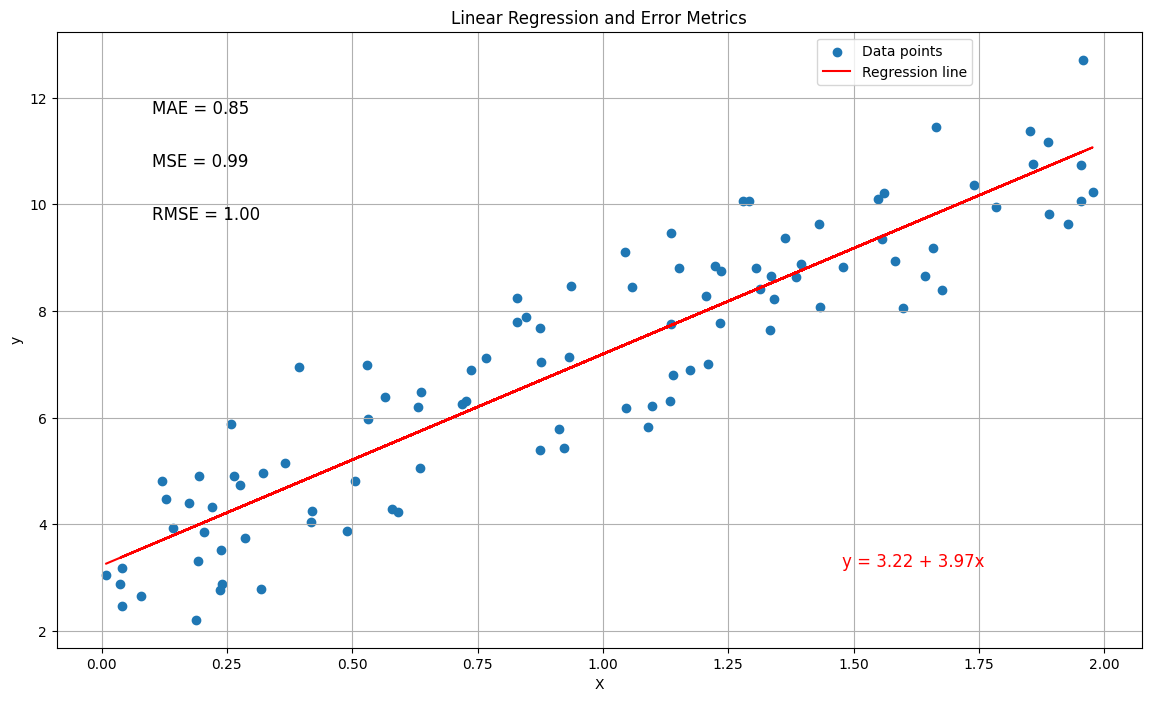

('y = 3.22 + 3.97x', 0.849258198323929, 0.9924386487246483, 0.9962121504602562)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for linear regression
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 3 + 4 * X + np.random.randn(100, 1)

# Perform linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

# Calculate the regression equation
slope = lin_reg.coef_[0][0]
intercept = lin_reg.intercept_[0]
regression_eq = f"y = {intercept:.2f} + {slope:.2f}x"

# Calculate MAE, MSE, RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = sqrt(mse)

# Create the plot
plt.figure(figsize=(14, 8))
plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')

# Annotate MAE, MSE, RMSE
plt.annotate(f"MAE = {mae:.2f}", xy=(0.1, y.max() - 1), fontsize=12)
plt.annotate(f"MSE = {mse:.2f}", xy=(0.1, y.max() - 2), fontsize=12)
plt.annotate(f"RMSE = {rmse:.2f}", xy=(0.1, y.max() - 3), fontsize=12)

# Annotate the regression equation
plt.annotate(regression_eq, xy=(X.max() - 0.5, y.min() + 1), fontsize=12, color='red')

plt.title('Linear Regression and Error Metrics')
plt.legend(bbox_to_anchor=(.85, 1))
plt.grid(True)
plt.show()

regression_eq, mae, mse, rmse

## R^2 and Adjusted R^2

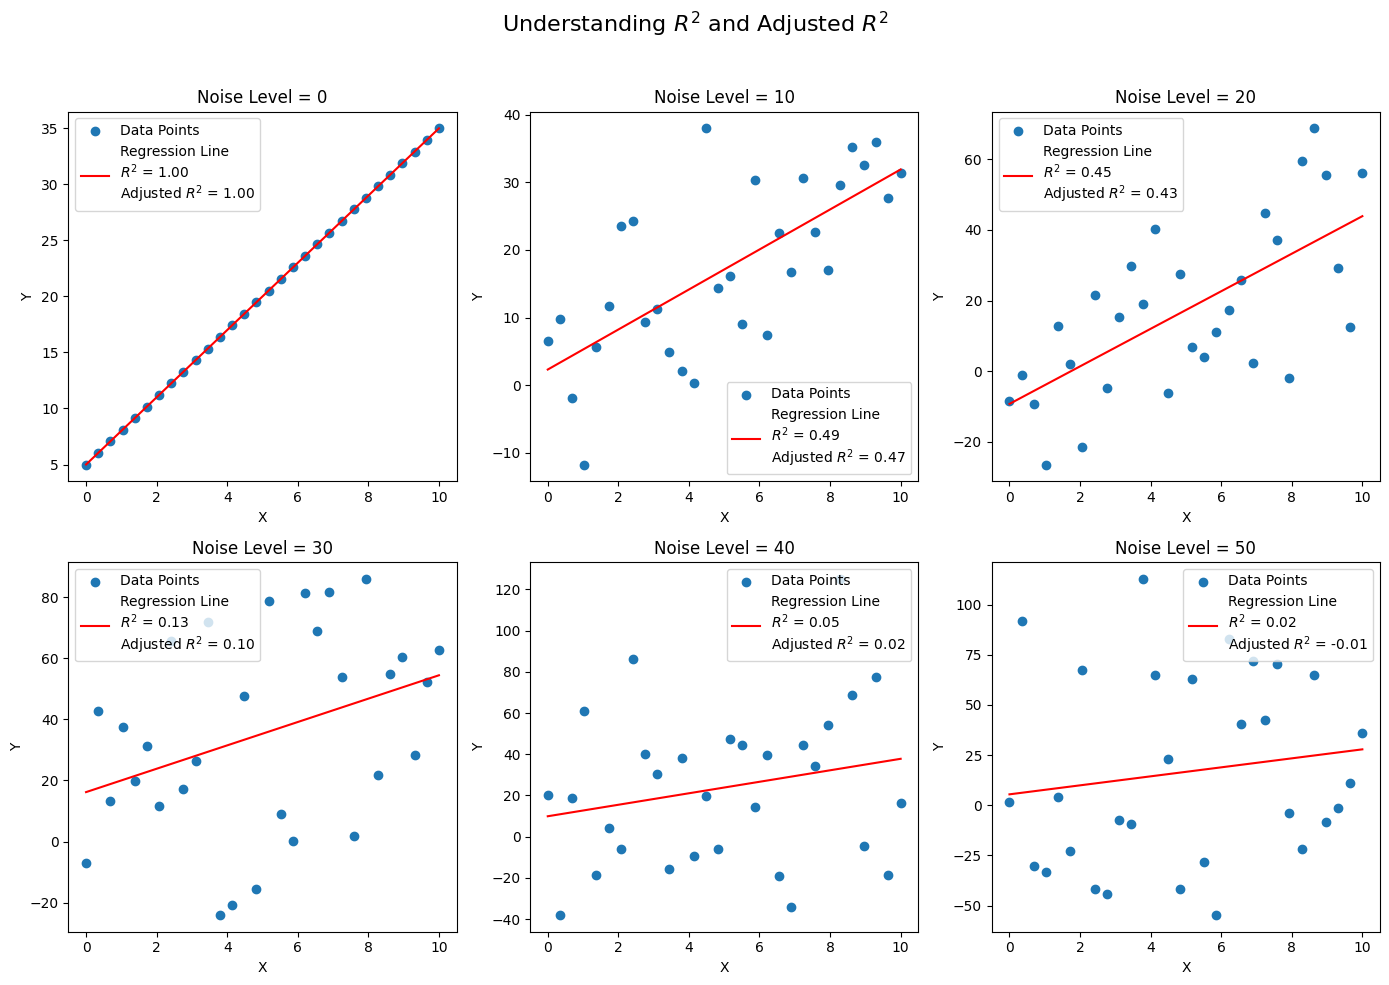

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Function to calculate Adjusted R-squared
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Data generation
np.random.seed(0)
x = np.linspace(0, 10, 30)
y_perfect = 3 * x + 5

# Noise levels
noise_levels = [0, 10, 20, 30, 40, 50]

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(14, 10))
fig.suptitle("Understanding $R^2$ and Adjusted $R^2$", fontsize=16)

# Loop through subplots to create different noise levels
for i, noise_level in enumerate(noise_levels):
    row = i // 3
    col = i % 3
    y = y_perfect + np.random.normal(0, noise_level, len(x))
    
    # Linear Regression
    x_reshaped = x.reshape(-1, 1)
    reg = LinearRegression().fit(x_reshaped, y)
    y_pred = reg.predict(x_reshaped)
    
    # Metrics
    r2 = r2_score(y, y_pred)
    adj_r2 = adjusted_r2(r2, len(y), 1)
    
    # Plotting
    axs[row,col].scatter(x, y, label='Data Points')
    axs[row,col].plot(x, y_pred, color='r', label=f"Regression Line\n$R^2$ = {r2:.2f}\nAdjusted $R^2$ = {adj_r2:.2f}")
    axs[row,col].set_title(f"Noise Level = {noise_level}")
    axs[row,col].set_xlabel("X")
    axs[row,col].set_ylabel("Y")
    axs[row,col].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()